# Proyek Akhir Submission (Sistem Rekomendasi Anime)
Disusun oleh : Brilly Lutfan Qasthari
Laporan tentang hasil dokumentasi submission terakhir bertema Sistem Rekomendasi menggunakan *Content-based Filtering* dan *Collaborative Filtering*.
## Project Overview

Dalam beberapa tahun terakhir, anime telah menjadi fenomena global dan semakin populer di kalangan pecinta hiburan. Dengan peningkatan popularitas ini, jumlah anime yang bisa ditonton juga meningkat pesat. Namun, dengan banyaknya pilihan anime, pengguna seringkali kesulitan menemukan anime yang sesuai dengan minat dan preferensi mereka. Hal ini dapat membuat pengguna bingung, membuang waktu, bahkan frustasi dalam mencari anime yang diinginkan. 

Dalam konteks ini, sistem rekomendasi anime sangatlah penting. Sistem ini dapat membantu pengguna menemukan anime baru yang sesuai dengan minat, mengurangi kebingungan dalam memilih, dan memperluas wawasan anime. Dengan menggunakan teknik dan algoritma yang tepat, sistem rekomendasi anime dapat memberikan rekomendasi yang dipersonalisasi dan relevan kepada pengguna, sehingga meningkatkan pengalaman menonton dan kepuasan pengguna [[1](https://ojs.unud.ac.id/index.php/jnatia/article/download/92636/47032/)]. 

Sistem rekomendasi anime adalah sistem yang merekomendasikan anime kepada pengguna berdasarkan preferensi mereka. Sistem ini dapat membantu pengguna menemukan anime yang sesuai dengan selera. Latar belakang masalah yang dihadapi dalam pengembangan sistem rekomendasi anime adalah kurangnya kualitas informasi yang baik dan keterbatasan jumlah informasi [[2](https://repository.upnvj.ac.id/2016/1/AWAL.pdf)]. 

Oleh karena itu, pengembangan sistem rekomendasi anime sangat menarik untuk diteliti lebih lanjut. Sistem rekomendasi menawarkan berbagai manfaat yang dapat dicapai baik oleh pengguna maupun pengusaha. Oleh karena itu, sangat penting untuk dikembangkan lebih lanjut, terutama di saat informasi dan data berkembang dengan sangat cepat. Dalam proyek ini saya juga fokus pada pengembangan sistem rekomendasi anime. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [ ]:
!git clone https://github.com/projekbrillylutfan/kumpulan_dataset

Cloning into 'kumpulan_dataset'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 19 (delta 3), reused 13 (delta 1), pack-reused 0
Unpacking objects: 100% (19/19), 25.75 MiB | 2.30 MiB/s, done.
Updating files: 100% (5/5), done.


In [ ]:
anime_ovrl = pd.read_csv("/content/kumpulan_dataset/Anime Dataset Rekomen/anime.csv")
rtg_anime = pd.read_csv("/content/kumpulan_dataset/Anime Dataset Rekomen/rating.csv")

## Business Understanding

Dalam bisnis, sistem rekomendasi anime memiliki potensi besar untuk meningkatkan pengalaman pengguna, meningkatkan pangsa pasar, dan meningkatkan keterlibatan pengguna dalam industri anime. Berikut adalah beberapa aspek bisnis dari sistem rekomendasi anime seperti: 

1. **Personalisasi dan Pengalaman Pengguna yang Lebih Baik**
   Dengan menggunakan sistem rekomendasi anime, perusahaan dapat menawarkan pengalaman yang lebih personal dan relevan kepada pengguna. Dengan memahami preferensi pengguna, sistem dapat merekomendasikan anime berdasarkan minat mereka. Hal ini dapat meningkatkan kepuasan pengguna, meningkatkan waktu yang dihabiskan pengguna untuk menonton anime, dan meningkatkan loyalitas pengguna terhadap platform atau layanan yang memberikan rekomendasi tersebut.
2. **Meningkatkan Retensi Pengguna**
   Dalam industri yang penuh dengan pilihan anime, retensi pengguna menjadi faktor kunci kesuksesan bisnis. Sistem rekomendasi anime dapat membantu mempertahankan pengguna dengan terus memberikan rekomendasi yang relevan. Dengan mempertahankan pengguna yang ada, organisasi dapat meningkatkan nilai seumur hidup pengguna dan mengurangi churn. 
3. **Diversifikasi Penonton dan Mempengaruhi Pembelian**
   Sistem rekomendasi anime dapat membantu bisnis mengatasi tantangan dalam menjangkau audiens yang berbeda. Dengan menganalisis preferensi dan perilaku pengguna, sistem dapat merekomendasikan anime yang mungkin tidak diketahui pengguna atau yang berada di luar zona nyaman mereka. Ini dapat membantu perusahaan memperluas audiens mereka, memperkenalkan anime baru kepada pengguna, dan bahkan memengaruhi keputusan pembelian dalam bentuk pesanan barang dagangan, DVD, atau layanan streaming.

### Problem Statements

Berdasarkan masalah yang telah dijelaskan sebelumnya, masalah utama untuk proyek ini adalah sebagai berikut.
- Apakah sistem dapat memberikan rekomendasi yang relevan ?
- Bagaimana performa model dalam memprediksi rekomendasi untuk user ?

### Goals

Adapun tujuan yang dicapai oleh proyek ini sebagai berikut:
- Menghasilkan sebuha model sistem rekomendasi berbasis konten untuk memprediksi rekomendasi pengguna.
- Menghasilkan sebuha model sistem rekomendasi berbasis *collaborative filtering* untuk memprediksi rekomendasi pengguna.

### Solution statements

Adapun solusi yang dapat diberikan untuk proyek ini meliputi:
- Membuat sebuah sistem rekomendasi berbasis *Content-based Filtering* berdasarkan data genre anime.
- Membuat sebuah sistem rekomendasi berbasis *Collaborative Filtering* berdasarkan data rating anime yang telah diberikan oleh user.

In [ ]:
anime_ovrl

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [ ]:
anime_ovrl.shape

(12294, 7)

In [ ]:
rtg_anime

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


In [ ]:
rtg_anime.shape

(7813737, 3)

In [ ]:
print('Jumlah data anime di dalam database : ', len(anime_ovrl.anime_id.unique()))
print('Jumlah data rating anime dalam database: ', len(rtg_anime.user_id.unique()))

Jumlah data anime di dalam database :  12294
Jumlah data rating anime dalam database:  73515


In [ ]:
print('Jumlah data genre anime dalam database: ', len(anime_ovrl.genre.unique()))
print('Jumlah data tipe anime dalam database: ', len(anime_ovrl.type.unique()))

Jumlah data genre anime dalam database:  3265
Jumlah data tipe anime dalam database:  7


# **Data Understanding**
Dataset yang digunakan dalam proyek ini adalah daftar judul anime dengan fitur, jumlah penggemar, dan rata-rata rating pengguna. Dataset dapat di unduh [disini](https://github.com/projekbrillylutfan/kumpulan_dataset/tree/main/Anime%20Dataset%20Rekomen), Kumpulan data ini berisi informasi data preferensi pengguna dari 73.516 pengguna di 12.294 anime. Setiap pengguna dapat menambahkan anime ke daftar lengkap mereka dan memberikannya peringkat dan kumpulan data ini adalah kompilasi dari peringkat tersebut.

variabel pada data `anime.csv` meliputi :
* `anime_id` = id unik untuk data ini.
* `name` = judul anime secara lengkap.
* `genre` = genre anime secara lengkap.
* `type` = tipe tayang anime.
* `episodes` = jumlah episode anime.
* `rating` = rata-rata rating anime.
* `members` = jumlah komunitas member di setiap anime.

variabel pada data `rating.csv` meliputi :
* `user_id ` = id unik untuk user.
* `anime_id ` = id untuk user yang telah voting.
* `rating ` = rentang rating dari 1 sampai 10.

In [ ]:
anime_ovrl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [ ]:
rtg_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [ ]:
anime_ovrl.isna().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [ ]:
anime_ovrl.duplicated().sum()

0

In [ ]:
for col in anime_ovrl.select_dtypes(include=[np.number]).columns:
    count = (anime_ovrl[col] == 0).sum()
    print(f"Nilai 0 di kolom {col} ada: {count}")

Nilai 0 di kolom anime_id ada: 0
Nilai 0 di kolom rating ada: 0
Nilai 0 di kolom members ada: 0


In [ ]:
anime_ovrl.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [ ]:
anime_ovrl = anime_ovrl.dropna()

# Data Preprocessing
1. menghapus simbol pada anime.
2. menghapus outlier pada data `anime.csv` dan `rating.csv`.
3. menghapus data duplikat.
4. menghapus data yang memiliki missing value.

## **Missing Value**

In [ ]:
anime_ovrl.isna().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [ ]:
anime_ovrl.describe()

,anime_id,rating,members
count,12017.000000,12017.000000,1.201700e+04
mean,13638.001165,6.478264,1.834888e+04
std,11231.076675,1.023857,5.537250e+04
min,1.000000,1.670000,1.200000e+01
25%,3391.000000,5.890000,2.250000e+02
50%,9959.000000,6.570000,1.552000e+03
75%,23729.000000,7.180000,9.588000e+03
max,34519.000000,10.000000,1.013917e+06


In [ ]:
for col in anime_ovrl.select_dtypes(exclude=[np.number]).columns:
    kate = anime_ovrl[col].value_counts()
    print(f"Rincian di {col} : ")
    print("----------------------awal--------------------")
    print(kate)
    print("----------------------akhir--------------------")

Rincian di name : 
----------------------awal--------------------
Shi Wan Ge Leng Xiaohua                                                                            2
Saru Kani Gassen                                                                                   2
CCW: Crazy Clay Wrestling                                                                          1
Crayon Angel                                                                                       1
Koumon-teki Juuku Ketsujiru Juke                                                                   1
                                                                                                  ..
Bakusou Kyoudai Let&#039;s &amp; Go!! WGP Bousou Mini Yonku Daitsuiseki                            1
Beet the Vandel Buster Excellion                                                                   1
Black Jack ONA                                                                                     1
Crayon Shin-chan Manatsu 

In [ ]:
rtg_anime.isna().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [ ]:
rtg_anime.duplicated().sum()

1

In [ ]:
for col in rtg_anime.select_dtypes(include=[np.number]).columns:
    count = (rtg_anime[col] == 0).sum()
    print(f"Nilai 0 di kolom {col} ada: {count}")

Nilai 0 di kolom user_id ada: 0
Nilai 0 di kolom anime_id ada: 0
Nilai 0 di kolom rating ada: 0


In [ ]:
rtg_anime.drop_duplicates(keep='first',inplace=True)

In [ ]:
rtg_anime.duplicated().sum()

0

In [ ]:
anime_ovrl

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


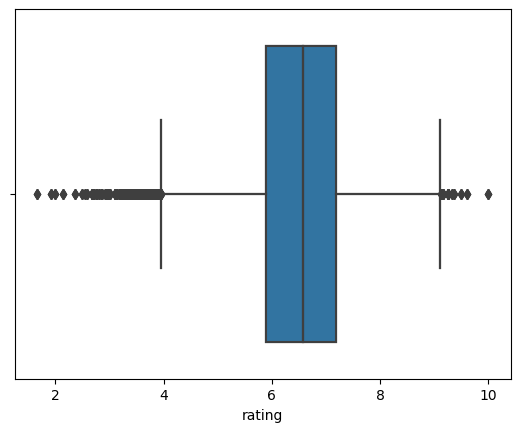

In [ ]:
columns = ['anime_id', 'rating', 'members']
for column in columns:
    sns.boxplot(x=anime_ovrl[col])

<Axes: xlabel='anime_id'>

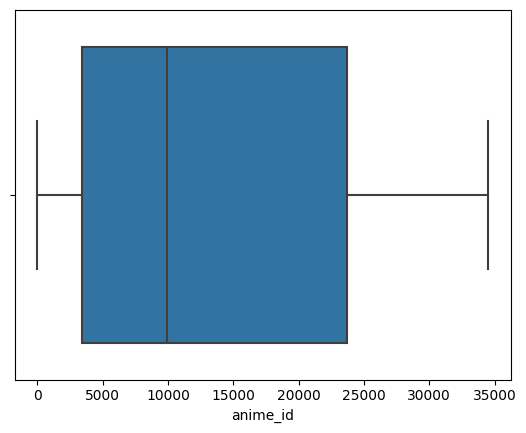

In [ ]:
sns.boxplot(x=anime_ovrl['anime_id'])

<Axes: xlabel='members'>

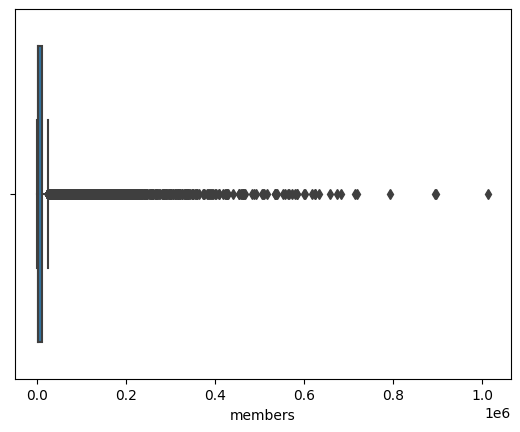

In [ ]:
sns.boxplot(x=anime_ovrl['members'])

In [ ]:
anime_ovrl.shape

(12017, 7)

In [ ]:
Q1 = anime_ovrl.quantile(0.25)
Q3 = anime_ovrl.quantile(0.75)
IQR=Q3-Q1
anime_ovrl=anime_ovrl[~((anime_ovrl<(Q1-1.5*IQR))|(anime_ovrl>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah kita drop outliers
anime_ovrl.shape

<ipython-input-30-4529c6651e83>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = anime_ovrl.quantile(0.25)
<ipython-input-30-4529c6651e83>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = anime_ovrl.quantile(0.75)
<ipython-input-30-4529c6651e83>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  anime_ovrl=anime_ovrl[~((anime_ovrl<(Q1-1.5*IQR))|(anime_ovrl>(Q3+1.5*IQR))).any(axis=1)]


(9922, 7)

In [ ]:
rtg_anime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7813736 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 238.5 MB


<Axes: xlabel='user_id'>

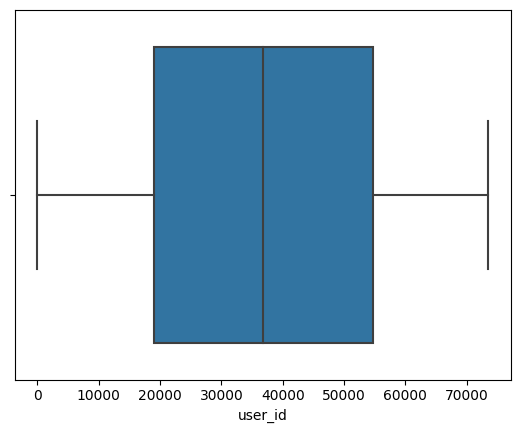

In [ ]:
sns.boxplot(x=rtg_anime['user_id'])

<Axes: xlabel='anime_id'>

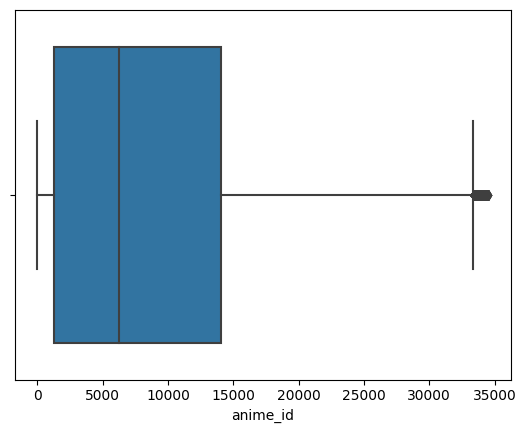

In [ ]:
sns.boxplot(x=rtg_anime['anime_id'])

<Axes: xlabel='rating'>

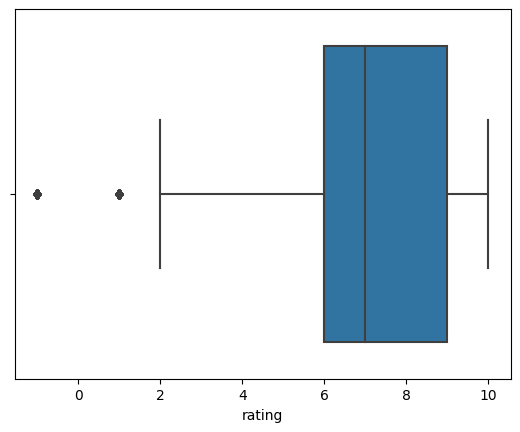

In [ ]:
sns.boxplot(x=rtg_anime['rating'])

In [ ]:
rtg_anime.shape

(7813736, 3)

In [ ]:
Q1 = rtg_anime.quantile(0.25)
Q3 = rtg_anime.quantile(0.75)
IQR=Q3-Q1
rtg_anime=rtg_anime[~((rtg_anime<(Q1-1.5*IQR))|(rtg_anime>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah kita drop outliers
rtg_anime.shape

(6316305, 3)

In [ ]:
import re
def text_clean(text):
    text = re.sub(r'"', '', text)
    text = re.sub(r'\.hack//', '', text)
    text = re.sub(r"'", '', text)
    text = re.sub(r"A's", '', text)
    text = re.sub(r"I'", "I'", text)
    text = re.sub(r'&', 'and', text)
    
    return text

anime_ovrl['name'] = anime_ovrl['name'].apply(text_clean)

<ipython-input-37-5d2503916c2c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime_ovrl['name'] = anime_ovrl['name'].apply(text_clean)


In [ ]:
anime_ovrl

,anime_id,name,genre,type,episodes,rating,members
41,32366,Gintama°: Aizome Kaori-hen,"Comedy, Parody",OVA,2,8.69,16947
63,21899,Gintama: Yorinuki Gintama-san on Theater 2D,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,2,8.60,11104
103,11917,Major: World Series,"Comedy, Drama, Sports",OVA,2,8.50,13405
111,2921,Ashita no Joe 2,"Drama, Sports",TV,47,8.48,6259
119,2559,Romeo no Aoi Sora,"Adventure, Drama, Historical, Slice of Life",TV,33,8.47,15074
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


# **Univariate Analysis**

Univariate Analysis adalah metode statistik yang digunakan untuk menganalisis satu variabel tunggal dalam suatu dataset. Tujuan dari analisis univariat adalah untuk memahami distribusi, pola, dan karakteristik dari variabel tersebut secara terpisah.

![distribusi anime](https://i.ibb.co/HCpSxvb/distribusi.png)
Gambar 1. Distribusi Anime
Pada Gambar 1 dapat dilihat bahwa data anime memiliki rating anime terendah 1,67 dan rating tertinggi 10 dengan rata-rata 6,48. Dataset ini juga memiliki jumlah anggota komunitas anime terendah yaitu 12 dan tertinggi 1013917 dengan rata-rata 18348. Perbedaan jumlah minimum dan maksimum anggota komunitas anime cukup besar dan itu bisa dimaklumi karena beberapa anime sangat populer dan beberapa tidak.

![distribusi rating](https://i.ibb.co/XzJZfGH/distribusi-rating.png)
Gambar 2. Distribusi Rating

Pada Gambar 2. menjelaskan bahwa Dalam catatan peringkat anime, peringkat terendah yang diberikan pengguna pada anime adalah -1 dan peringkat tertinggi adalah 10. Peringkat -1 berarti pengguna menonton anime tetapi tidak memberi peringkat. Pengguna sampel yang tidak memberikan peringkat tidak akan digunakan dan karenanya akan dihapus.

![Genre Terbanyak](https://i.ibb.co/m9dVbKM/genre.png)
Gambar 3. Visualisasi Genre Terbanyak

Pada Gambar 3 dapat dilihat kalau genre terbanyak ada di kategori hentai, kategori banyak kedua ada di genre komedi dan kategori terbanyak kedua ada di genre musik.

In [ ]:
anime_ovrl.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,anime_id,rating,members
count,9922.00,9922.00,9922.00
mean,13752.42,6.34,3259.68
std,11213.94,0.87,5053.61
min,8.00,3.96,17.00
25%,3517.25,5.79,178.00
50%,9884.50,6.42,959.50
75%,23907.50,6.95,3735.00
max,34519.00,9.00,23631.00


In [ ]:
anime_ovrl['genre'].value_counts(normalize=True).head(10)

Hentai                   0.081738
Comedy                   0.048277
Music                    0.028724
Kids                     0.018847
Comedy, Slice of Life    0.015118
Fantasy, Kids            0.012800
Comedy, Kids             0.011086
Dementia                 0.010986
Fantasy                  0.010482
Drama, Kids              0.010381
Name: genre, dtype: float64

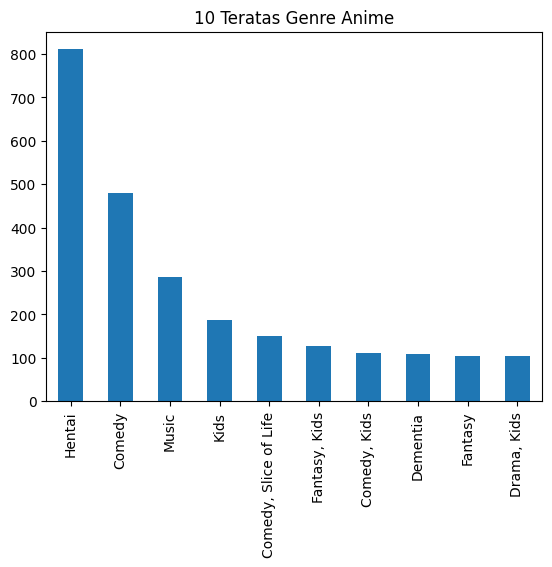

In [ ]:
anime_ovrl['genre'].value_counts().head(10).plot(kind='bar')
plt.title('10 Teratas Genre Anime')
plt.show()

In [ ]:
anime_ovrl.groupby('genre')['genre'].agg('count')

genre
Action                                                     51
Action, Adventure                                          13
Action, Adventure, Cars, Comedy, Sci-Fi, Shounen            2
Action, Adventure, Cars, Mecha, Sci-Fi, Shounen, Sports     1
Action, Adventure, Cars, Sci-Fi                             1
                                                           ..
Super Power, Supernatural, Vampire                          1
Supernatural                                               14
Thriller                                                    1
Vampire                                                     1
Yaoi                                                        2
Name: genre, Length: 2561, dtype: int64

In [ ]:
rtg_anime.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,user_id,anime_id,rating
count,6316305.00,6316305.00,6316305.00
mean,36749.11,8888.00,7.83
std,21014.12,8862.32,1.54
min,1.00,1.00,2.00
25%,18978.00,1238.00,7.00
50%,36822.00,6211.00,8.00
75%,54873.00,14075.00,9.00
max,73516.00,33372.00,10.00


In [ ]:
rtg_anime = rtg_anime[~(rtg_anime.rating == -1)]

In [ ]:
print('rating terbanyak oleh 1 user:', max(rtg_anime['user_id'].value_counts().values))
print('rating tersedikit oleh 1 user:', min(rtg_anime['user_id'].value_counts().values))
print('jumlah rating oleh 1 user:', rtg_anime['user_id'].value_counts().median())

rating terbanyak oleh 1 user: 3747
rating tersedikit oleh 1 user: 1
jumlah rating oleh 1 user: 45.0


In [ ]:
print('rating terbanyak untuk 1 anime:', max(rtg_anime['anime_id'].value_counts().values))
print('rating tersedikit untuk 1 anime:', min(rtg_anime['anime_id'].value_counts().values))
print('jumlah rating untuk 1 anime AVG:', rtg_anime['anime_id'].value_counts().median())

rating terbanyak untuk 1 anime: 34196
rating tersedikit untuk 1 anime: 1
jumlah rating untuk 1 anime AVG: 58.0


<Axes: xlabel='rating', ylabel='Count'>

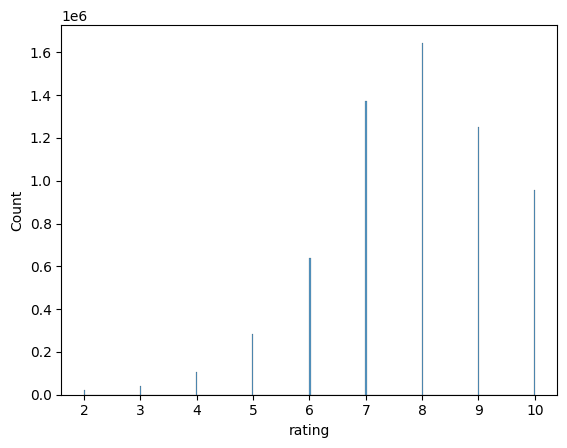

In [ ]:
sns.histplot(x='rating', data=rtg_anime)

# **Data Preparation**

Pada tahapan ini saya melakukan:
1. Encoding kolom user id dan dan anime id yang bertujuan untuk mengubah data dari format yang asli menjadi format yang dapat dipahami atau diproses oleh komputer. Encoding adalah proses representasi data dengan menggunakan aturan tertentu agar dapat disimpan, ditransmisikan, atau diproses dengan efisien dan akurat.
2. Normalisasi nilai rating untuk memudahkan training hal ini bertujuan data untuk mengubahnya menjadi bentuk yang lebih terstandarisasi atau normal. Tujuan normalisasi adalah untuk menghilangkan perbedaan skala, mengurangi bias, atau menyesuaikan data agar dapat dibandingkan atau diproses dengan lebih baik.
3. Train-Test Split untuk melakukan validasi model dengan pembagian 80% data training dan 20% data testing

In [ ]:
df_train = rtg_anime.copy()

In [ ]:
df_train

,user_id,anime_id,rating
2620444,23423,2914,6.0
2485529,22329,1537,9.0
5627909,49979,105,9.0
4638754,41895,1087,8.0
62372,611,65,8.0
...,...,...,...
1943771,17807,250,7.0
2754732,24487,1180,7.0
6105581,54230,563,5.0
5343172,47846,1073,9.0


In [ ]:
user_ids = df_train['user_id'].unique().tolist()
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

anime_ids = df_train['anime_id'].unique().tolist()
anime_to_anime_encoded = {x: i for i, x in enumerate(anime_ids)}
anime_encoded_to_anime = {i: x for i, x in enumerate(anime_ids)}

In [ ]:
df_train['user_id'] = df_train['user_id'].map(user_to_user_encoded)
df_train['anime_id'] = df_train['anime_id'].map(anime_to_anime_encoded)

num_users = len(user_to_user_encoded)
num_anime = len(anime_to_anime_encoded)

In [ ]:
df_train['rating'] = df_train['rating'].values.astype(np.float32)
min_rating = min(df_train['rating'])
max_rating = max(df_train['rating'])

In [ ]:
df_train = df_train.sample(frac=1, random_state=42)
X = df_train[['user_id', 'anime_id']].values
y = df_train['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
train_indices = int(0.8 * df_train.shape[0])

X_train, X_test, y_train, y_test = (X[:train_indices], X[train_indices:], y[:train_indices], y[train_indices:])

# **Modelling**

Dalam proyek ini, saya menggunakan dua jenis sistem rekomendasi yaitu *content-based filtering* (CBF) dan *collaborative filtering* (CF). Untuk CBF, saya akan menggunakan vektorisasi TF-IDF dan cosine similarity sebagai similarity function-nya.
Untuk kelebihan vektorisasi TF-IDF adalah :
1. Merepresentasikan kepentingan relatif kata dalam dokumen: Dengan menggunakan skema bobot TF-IDF, vektorisasi TF-IDF memberikan bobot yang lebih tinggi untuk kata-kata yang jarang muncul dalam dokumen tetapi muncul secara khusus dalam dokumen tertentu. Hal ini membantu dalam mengidentifikasi kata-kata kunci atau kata-kata yang paling mewakili dokumen.
2. Mengurangi dampak kata-kata umum: Vektorisasi TF-IDF secara inheren memberikan bobot yang lebih rendah untuk kata-kata umum yang muncul di banyak dokumen. Ini membantu dalam mengidentifikasi kata-kata yang lebih spesifik dan lebih deskriptif dari sebuah dokumen.
3. Efektif dalam mewakili dokumen panjang: Vektorisasi TF-IDF cenderung efektif dalam mengatasi masalah dokumen yang panjang dengan banyak kata. Bobot TF-IDF membantu dalam menyoroti kata-kata kunci yang unik dan penting dalam dokumen.

Untuk kekurangan vektorisasi TF-IDF :
1. Tidak memperhitungkan konteks kata: Vektorisasi TF-IDF hanya memperhitungkan keberadaan kata dalam dokumen dan frekuensi kemunculannya, tanpa memperhitungkan konteks kata. Artinya, informasi tentang urutan kata dan hubungannya tidak diperhitungkan dalam vektorisasi ini.
2. Tidak mempertimbangkan makna kata: Vektorisasi TF-IDF tidak mempertimbangkan makna kata-kata secara langsung. Hal ini dapat menyebabkan masalah jika kata-kata yang serupa secara makna tetapi berbeda secara ortografi diberikan bobot yang berbeda secara signifikan.

Kelebihan cosine similarity: 
1. Mengukur kesamaan semantik: Cosine similarity mengukur kesamaan antara dua vektor dokumen berdasarkan arah dan bukan panjang vektor. Ini memungkinkan pengukuran kesamaan yang lebih baik secara semantik daripada hanya menggunakan frekuensi kata.
2. Skala independen: Cosine similarity tidak tergantung pada skala data atau panjang dokumen. Hal ini memungkinkan perbandingan yang adil antara dokumen-dokumen dengan panjang yang berbeda.

Kekurangan cosine similarity:
1. Tidak memperhitungkan konteks kata: Seperti halnya vektorisasi TF-IDF, cosine similarity juga tidak memperhitungkan konteks kata. Informasi tentang urutan kata dan hubungannya tidak diperhitungkan dalam perhitungan kesamaan.
2. Rentan terhadap kata-kata umum: Cosine similarity tidak secara langsung mengurangi dampak kata-kata umum. Kata-kata yang sering muncul dalam banyak dokumen dapat memiliki bobot yang tinggi dan mempengaruhi hasil perhitungan kesamaan.

Hasil output dari CBF ada di Gambar 4 sebagai berikut:
![Oni rekomendasi](https://i.ibb.co/NjSvjzX/oni-rekomendasi.png)
Gambar 4. Hasil Prediksi CBF
Dari Gambar 4 dapat dilihat kalau sistem ingin merekomendasikan judul "Oni" dengan genre demon, historikal, dan supernatural. Sistem dapat merekomendasikan dengan genre yang tepat dengan sesuai dan presisi.

Lalu untuk *collaborative filtering* (CF) merupakan salah satu metode yang digunakan dalam sistem rekomendasi untuk menyajikan rekomendasi kepada pengguna berdasarkan preferensi atau perilaku pengguna lain yang memiliki kesamaan dengan pengguna tersebut. Metode ini memanfaatkan informasi dari pengguna-pengguna lain atau item-item yang serupa untuk memberikan rekomendasi.

Kelebihan CF:
1. Memperhitungkan preferensi pengguna: Collaborative filtering memperhitungkan preferensi pengguna berdasarkan data riwayat pengguna atau perilaku pengguna lain yang memiliki kesamaan dengan pengguna target. Hal ini memungkinkan rekomendasi yang lebih personal dan relevan dengan preferensi pengguna.
2. Tidak membutuhkan informasi konten: Collaborative filtering tidak membutuhkan informasi rinci tentang item atau konten yang direkomendasikan. Ini memungkinkan sistem rekomendasi untuk memberikan rekomendasi bahkan jika tidak ada informasi konten yang tersedia.
3. Dapat menemukan preferensi baru: Collaborative filtering dapat menemukan preferensi baru yang mungkin tidak terdeteksi oleh metode rekomendasi lainnya. Hal ini terjadi ketika pengguna memiliki preferensi yang sama dengan pengguna lain yang tidak terduga.

Kekurangan CF:
1. Masalah cold start: Collaborative filtering menghadapi masalah cold start ketika sistem tidak memiliki informasi yang cukup tentang pengguna baru atau item baru. Dalam situasi ini, sulit untuk memberikan rekomendasi yang akurat karena tidak ada data riwayat yang cukup untuk digunakan dalam perhitungan rekomendasi.
2. Masalah skalabilitas: Ketika jumlah pengguna dan item sangat besar, perhitungan kesamaan dan penyimpanan data kolaboratif bisa menjadi rumit dan memakan waktu. Hal ini dapat mempengaruhi kinerja sistem rekomendasi dan memerlukan infrastruktur yang kuat untuk menangani volume data yang besar.
3. Efek "filter bubble": Collaborative filtering cenderung memperkuat preferensi yang ada dan membentuk apa yang disebut "filter bubble". Pengguna mungkin terpapar dengan rekomendasi yang serupa dan tidak cukup beragam, sehingga mengurangi variasi dan eksplorasi pengguna dalam menemukan hal-hal baru.

Penggunaan collaborative filtering yang efektif membutuhkan jumlah data yang signifikan dan keberadaan pengguna dan item yang serupa. Selain itu, perlu memperhatikan dan mengatasi masalah cold start dan efek "filter bubble" untuk memberikan rekomendasi yang berkualitas.

Hasil output dari CF ada di Gambar 5 sebagai berikut:
![CF rekomendasi](https://i.ibb.co/Rh9SS6K/CF.png)
Gambar 5. CF rekomendasi

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tf = TfidfVectorizer()
tf.fit(anime_ovrl['genre']) 
tf.get_feature_names_out()

array(['action', 'adventure', 'ai', 'arts', 'cars', 'comedy', 'dementia',
       'demons', 'drama', 'ecchi', 'fantasy', 'fi', 'game', 'harem',
       'hentai', 'historical', 'horror', 'josei', 'kids', 'life', 'magic',
       'martial', 'mecha', 'military', 'music', 'mystery', 'of', 'parody',
       'police', 'power', 'psychological', 'romance', 'samurai', 'school',
       'sci', 'seinen', 'shoujo', 'shounen', 'slice', 'space', 'sports',
       'super', 'supernatural', 'thriller', 'vampire', 'yaoi', 'yuri'],
      dtype=object)

In [ ]:
tfidf_matrix = tf.fit_transform(anime_ovrl['genre'])
tfidf_matrix.shape 

(9922, 47)

In [ ]:
tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.26121435, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [ ]:
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1.        , 0.48826893, 0.1557474 , ..., 0.        , 0.        ,
        0.        ],
       [0.48826893, 1.        , 0.07604662, ..., 0.        , 0.        ,
        0.        ],
       [0.1557474 , 0.07604662, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ]])

In [ ]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=anime_ovrl['name'], columns=anime_ovrl['name'])
print('Shape:', cosine_sim_df.shape)
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (9922, 9922)


name,Hong Kil-dong,Puchimas!: Petit iDOLM@STER Episode 0,Otoko to Onna to Inu,Mahou Shoujo Ai San: The Anime,Shitamachi Alien PapiPipiPupi
name,,,,,
Magic-Kyun! Renaissance,0.000000,0.246630,0.406459,0.230770,0.0
Gifuu Doudou!!: Kanetsugu to Keiji,0.235785,0.000000,0.000000,0.000000,0.0
Jinxiu Shenzhou Zhi Qi You Ji,0.718618,0.000000,0.000000,0.000000,0.0
Yodaka no Hoshi,0.337744,0.000000,0.000000,0.000000,0.0
The Olympic Challenge,0.000000,0.000000,0.000000,0.000000,0.0
Huckleberry no Bouken (Movie),0.720647,0.000000,0.000000,0.000000,0.0
Ticonderonga no Iru Umi,0.465570,0.000000,0.000000,0.000000,0.0
Penguin Musume♥Heart,0.000000,0.647430,0.123790,0.200802,0.0
Sore Ike! Anpanman: Utatte Teasobi! Anpanman to Mori no Takara,0.317771,0.128176,0.231413,0.000000,0.0


# **Evaluasi Content-based Filtering**

In [ ]:
def anime_recommendations(name, similarity_data=cosine_sim_df, items=anime_ovrl[['name', 'genre']], k=5):
 
    index = similarity_data.loc[:,name].to_numpy().argpartition(
        range(-1, -k, -1))
    
    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    # Drop name agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(name, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

In [ ]:
anime_ovrl[anime_ovrl.name.eq('Oni')]

,anime_id,name,genre,type,episodes,rating,members
5493,7171,Oni,"Demons, Historical, Supernatural",Movie,1,6.44,950


In [ ]:
anime_recommendations('Oni')

,name,genre
0,Tenpou Ibun: Ayakashi Ayashi,"Demons, Historical, Supernatural"
1,Kataku,"Demons, Historical, Supernatural"
2,Sengoku Choujuu Giga,"Demons, Historical, Supernatural"
3,Kujakuou: Sengoku Tensei,"Action, Demons, Historical, Supernatural"
4,Chrno Crusade: Az demo Wakaru Chrno Crusade Kouza,"Adventure, Comedy, Demons, Historical, Superna..."


## **Collaborative filtering**

In [ ]:
# Import library
import pandas as pd
import numpy as np 
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [ ]:
class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_resto, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_resto = num_resto
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.resto_embedding = layers.Embedding( # layer embeddings resto
        num_resto,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.resto_bias = layers.Embedding(num_resto, 1) # layer embedding resto bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    resto_vector = self.resto_embedding(inputs[:, 1]) # memanggil layer embedding 3
    resto_bias = self.resto_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_resto = tf.tensordot(user_vector, resto_vector, 2) 
 
    x = dot_user_resto + user_bias + resto_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

In [ ]:
model = RecommenderNet(num_users, num_anime, 50)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
              optimizer=keras.optimizers.Adam(learning_rate=0.0005),
              metrics=[tf.keras.metrics.MeanAbsoluteError()])

In [ ]:
model.summary

<bound method Model.summary of <__main__.RecommenderNet object at 0x7fc29ee2f1f0>>

In [ ]:
history = model.fit(x=X_train, y=y_train,
                    batch_size=256, epochs=10, verbose=1, 
                    validation_data=(X_test, y_test))

Epoch 1/10
19739/19739 [==============================] - 124s 6ms/step - loss: 0.5721 - mean_absolute_error: 0.1372 - val_loss: 0.5696 - val_mean_absolute_error: 0.1314
Epoch 2/10
19739/19739 [==============================] - 120s 6ms/step - loss: 0.5762 - mean_absolute_error: 0.1349 - val_loss: 0.5844 - val_mean_absolute_error: 0.1399
Epoch 3/10
19739/19739 [==============================] - 120s 6ms/step - loss: 0.5942 - mean_absolute_error: 0.1451 - val_loss: 0.6010 - val_mean_absolute_error: 0.1481
Epoch 4/10
19739/19739 [==============================] - 113s 6ms/step - loss: 0.6132 - mean_absolute_error: 0.1547 - val_loss: 0.6170 - val_mean_absolute_error: 0.1564
Epoch 5/10
19739/19739 [==============================] - 122s 6ms/step - loss: 0.6316 - mean_absolute_error: 0.1632 - val_loss: 0.6327 - val_mean_absolute_error: 0.1625
Epoch 6/10
19739/19739 [==============================] - 114s 6ms/step - loss: 0.6483 - mean_absolute_error: 0.1701 - val_loss: 0.6477 - val_mean_abs

# **Evaluasi Collaborative Filtering**

Dalam proyek ini penulis menggunakan metrik MAE(Mean Absolute Error) untuk *collaborative filtering* yang merupakan metrik evaluasi yang digunakan untuk mengukur kesalahan atau selisih antara nilai prediksi dan nilai aktual dalam konteks pemodelan atau peramalan. MAE mengukur kesalahan rata-rata secara absolut, yaitu selisih antara nilai prediksi dan nilai aktual tanpa mempertimbangkan arah atau signifikansi dari selisih tersebut. MAE menghitung nilai absolut dari setiap selisih dan kemudian mengambil rata-rata dari seluruh nilai absolut tersebut. MAE memiliki skala yang sama dengan variabel yang diukur, sehingga lebih mudah untuk diinterpretasikan daripada metrik evaluasi lainnya seperti Mean Squared Error (MSE) yang memiliki skala kuadrat.

![MAE](https://i.ibb.co/xzLxD31/mae.png)
Gambar 6. Rumus MAE
Rincian Sistematis rumus MAE pada Gambar 6 dapat dilihat sebagai berikut:

* MAE adalah Mean Absolute Error.
* n adalah jumlah sampel atau observasi.
* Σ adalah simbol sigma yang menunjukkan penjumlahan.
* yi adalah nilai aktual atau nilai yang diamati.
* xi adalah nilai prediksi atau nilai yang diprediksi.

Semakin rendah nilai MAE, semakin baik kualitas prediksi atau model yang digunakan. MAE digunakan dalam berbagai bidang seperti statistik, pemodelan data, dan machine learning untuk mengevaluasi kinerja model dalam memprediksi nilai atau variabel tertentu.

Lalu untuk model yang dihasilkan MAE terukur naik secara signifikan, hal ini dapat dilihat pada Gambar 7:

![Hasil MAE](https://i.ibb.co/bgGLrw6/hasil-MAE.png)
Gambar 7. Hasil MAE Menggunakan *collaborative filtering*

Pada Gambar 7 dapat dilihat kalau model *collaborative filtering* tidak cocok dengan data yang diujikan, hal ini dapat dipengaruhi beberapa faktor seperti:

1. Sparsitas data: Jika data kolaboratif memiliki banyak kekosongan atau kekurangan interaksi antara pengguna dan item, ini dapat menyebabkan nilai MAE yang tinggi. Ketika terdapat sedikit informasi atau interaksi yang tersedia untuk memperkirakan preferensi pengguna, prediksi yang dihasilkan cenderung kurang akurat.
2. Heterogenitas preferensi pengguna: Jika preferensi pengguna sangat beragam atau heterogen, ini dapat meningkatkan nilai MAE. Dalam situasi ini, sulit untuk menemukan pengguna yang memiliki preferensi yang mirip atau tetangga yang relevan untuk membuat prediksi yang akurat.
3. Data yang tidak lengkap atau tidak akurat: Jika data kolaboratif mengandung nilai yang hilang, data yang tidak lengkap, atau kesalahan dalam nilai, hal ini dapat mengganggu kemampuan model collaborative filtering untuk memberikan prediksi yang akurat. Data yang buruk atau tidak lengkap dapat menghasilkan kesalahan dalam perhitungan kesamaan atau estimasi preferensi.
4. Kurangnya informasi kontekstual: Collaborative filtering cenderung hanya mempertimbangkan interaksi antara pengguna dan item tanpa mempertimbangkan faktor kontekstual yang mungkin mempengaruhi preferensi pengguna. Faktor-faktor seperti waktu, lokasi, atau situasi yang dapat memengaruhi preferensi tidak dipertimbangkan secara eksplisit dalam metode collaborative filtering tradisional.
5. Kurangnya diversitas rekomendasi: Jika sistem collaborative filtering cenderung memberikan rekomendasi yang terlalu serupa atau kurang beragam, hal ini dapat menyebabkan nilai MAE yang tinggi. Pengguna mungkin memperoleh rekomendasi yang tidak cukup bervariasi atau tidak mampu menemukan preferensi baru yang berbeda dari preferensi yang sudah ada.
6. Masalah cold start: Masalah cold start muncul ketika sistem tidak memiliki informasi yang cukup tentang pengguna baru atau item baru. Dalam situasi ini, sulit untuk memberikan rekomendasi yang akurat karena kurangnya data riwayat atau interaksi.

Mengatasi faktor-faktor ini dapat membantu dalam mengurangi nilai MAE yang tinggi pada collaborative filtering. Beberapa pendekatan termasuk penggunaan teknik pengisian nilai yang hilang, peningkatan metode penghitungan kesamaan, penggunaan metode ensemble, dan memperkaya data dengan informasi kontekstual.

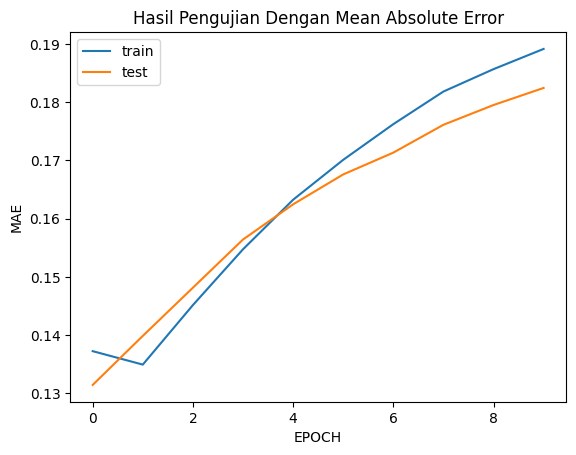

In [ ]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('Hasil Pengujian Dengan Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('EPOCH')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
user_id = 23423 # dapat diganti untuk memilih sampel user

movies_df = pd.read_csv('/content/kumpulan_dataset/Anime Dataset Rekomen/anime.csv')

watched_movies = df_train[df_train['user_id'] == user_id]

not_watched_movies = movies_df[~movies_df['anime_id'].isin(watched_movies['anime_id'].values)]['anime_id']
not_watched_movies = list(set(not_watched_movies).intersection(set(anime_to_anime_encoded.keys())))
not_watched_movies = [[anime_to_anime_encoded.get(x)] for x in not_watched_movies]

user_encoder = user_to_user_encoded.get(user_id)
user_movie_array = np.hstack(([[user_encoder]] * len(not_watched_movies), not_watched_movies))

pred_ratings = model.predict(user_movie_array).flatten()
top_ratings_indices = pred_ratings.argsort()[-10:][::-1]
recommended_movie_ids = [anime_to_anime_encoded.get(not_watched_movies[x][0]) for x in top_ratings_indices]

305/305 [==============================] - 1s 3ms/step


In [ ]:
print('Menampilkan Rekomendasi Anime Pada User: {}'.format(user_id))
print('===' * 9)
print('Anime dengan Rating Tertinggi yang diinput user')
print('----' * 8)
 
top_movies_user = (
    watched_movies.sort_values(
        by='rating',
        ascending=False
    )
    .head(5)
    .anime_id.values
)

movies_df_rows = movies_df[movies_df['anime_id'].isin(top_movies_user)]
for row in movies_df_rows.itertuples():
    print(row.name, ':', row.genre)
    
print('----' * 8)
print('10 rekomendasi anime teratas')
print('----' * 8)
 
recommended_movies = movies_df[movies_df['anime_id'].isin(recommended_movie_ids)]
for row in recommended_movies.itertuples():
    print(row.name, ':', row.genre)

Menampilkan Rekomendasi Anime Pada User: 23423
Anime dengan Rating Tertinggi yang diinput user
--------------------------------
Onegai☆Teacher : Comedy, Drama, Romance, School, Sci-Fi
Kidou Senkan Nadesico: The Prince of Darkness : Action, Comedy, Drama, Mecha, Psychological, Sci-Fi, Shounen, Space
Makai Toshi Shinjuku : Adventure, Horror, Romance, Shounen, Supernatural
--------------------------------
10 rekomendasi anime teratas
--------------------------------
Onegai☆Teacher: Himitsu na Futari : Comedy, Ecchi, Romance, Sci-Fi
Nils no Fushigi na Tabi : Adventure, Fantasy, Kids
Nozomi Witches : Romance, Sports
Grey: Digital Target : Action, Fantasy, Sci-Fi
Down Load: Namu Amida Butsu wa Ai no Uta : Action, Adventure, Psychological, Sci-Fi
Choujin Densetsu Urotsukidouji: Mirai-hen : Demons, Fantasy, Hentai, Horror, Sci-Fi
Yukiyo Ichiya Monogatari : Hentai, Historical
